In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import numpy as np
import pandas as pd
from fastprogress.fastprogress import progress_bar

# Disable Decompression Bomb Protection
Image.MAX_IMAGE_PIXELS = None

## Load Images

In [3]:
im_orto = np.array(Image.open('normal_orto.tif')); im_orto.shape

(7387, 31586, 4)

In [4]:
im_orto_mask = np.array(Image.open('normal_mask.tif')); im_orto_mask.shape

(7387, 31586, 3)

In [5]:
im_orto_mask = im_orto_mask[:,:,0]

In [6]:
im_termal = np.array(Image.open('thermal_orto.tif')); im_termal.shape

(4930, 21081)

In [17]:
array_termal = Image.fromarray(im_termal*255/np.max(im_termal))

In [22]:
array_termal.convert('L').save('termal.png')

In [7]:
im = im_termal[2000:2200,10000:10200]

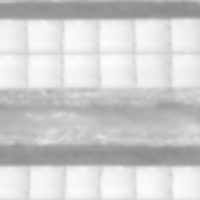

In [8]:
formatted = (im * 255 / np.max(im)).astype('uint8')
img = Image.fromarray(formatted)
img

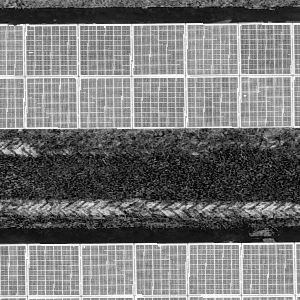

In [76]:
Image.fromarray(im_orto[3000:3300,15000:15300,2])

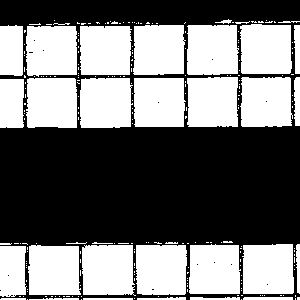

In [94]:
Image.fromarray(im_orto_mask[3000:3300,15000:15300])

In [95]:
def image_slice(im, x,y,w,h, mode=None):
    if len(im.shape)==3:
        return Image.fromarray(im[x:x+w,y:y+h,:], mode)
    else: return Image.fromarray(im[x:x+w,y:y+h], mode).convert('1')

In [96]:
x,y = 3000, 15000
w,h = 300, 300

In [97]:
im_orto.shape, im_orto_mask.shape

((7387, 31586, 4), (7387, 31586))

In [98]:
im = image_slice(im_orto_mask, x, y, w, h, mode='L');

In [100]:
im.save('test.png')

In [101]:
from helper_functions import *
def create_slices(img, img_mask, n, m, p1=0, p2=0, sz=256, display=True, 
                 save=False, quiet=False):
    if display: fig,ax = plt.subplots(n,m,figsize=(12,12),)
    info_list = []
    numbering = 0
    for an in progress_bar(range(n)):
        for am in range(m):
            x,y = (an+p1)*sz, (am+p2)*sz
            im = image_slice(img,x,y,sz,sz)
            im_mask = image_slice(img_mask,x,y,sz,sz, mode='L')
            if save:
                name = f'{str(numbering).zfill(5)}.png'
                info_list.append([name, x, y, an, am, sz])   
                if not quiet: print(f'Saving image: images/{name}')    
                im.save(f'images/{name}')
                im_mask.save(f'masks/{name}')
            if display: show_image(im, ax=ax[an,am])
            numbering += 1
    df = pd.DataFrame(info_list, columns=['ImageId', 'x', 'y', 'row', 'col', 'sz'])
    df.to_csv('images_meta.csv', index=None)
    return df

In [102]:
h,w,c = im_orto.shape; im_orto.shape

(7387, 31586, 4)

In [103]:
h//256,w//256

(28, 123)

In [104]:
df = create_slices(im_orto, im_orto_mask, 28, 123, sz=256, display=False, save=True, quiet=True)

In [208]:
import fastai
from fastai.vision import *

ModuleNotFoundError: No module named 'dataclasses'